In [ ]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
import pylab as pl
import sklearn.metrics as skm

print 'Preparing the HAR data from UCI...'

# subject id for each observation
subjects = pd.read_csv("/Users/frankCorrigan/ThinkfulData/UCI HAR Dataset/train/subject_train.txt", header=None, delim_whitespace=True, index_col=False)
subjects.columns = ['Subject']
subjects = pd.DataFrame(subjects)
# feature names for each column
feature_names = pd.read_csv("/Users/frankCorrigan/ThinkfulData/UCI HAR Dataset/features.txt", header=None, delim_whitespace=True, index_col=False)
# feature data
x_vars = pd.read_csv("/Users/frankCorrigan/ThinkfulData/UCI HAR Dataset/train/X_train.txt", header=None, delim_whitespace=True, index_col=False)
x_vars.columns = feature_names
# independent variable data. User activity.
y_var = pd.read_csv("/Users/frankCorrigan/ThinkfulData/UCI HAR Dataset/train/y_train.txt", header=None, delim_whitespace=True, index_col=False)
y_var = pd.DataFrame(y_var)
y_var.columns = ['Activity']

############# ORIGINAL RANDOM FOREST ####################

print 'Building original random forest model (no PCA analysis)...'

data = pd.merge(y_var, x_vars, left_index=True, right_index=True)
data = pd.merge(data, subjects, left_index=True, right_index=True)
data['Activity'] = pd.Categorical(data['Activity']).labels

fortrain = data.query('Subject >= 27')
fortest = data.query('Subject <= 6')
forval = data.query("(Subject >= 21) & (Subject < 27)")

train_target = fortrain['Activity']
train_data = fortrain.ix[:,1:-2]
rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
rfc.fit(train_data, train_target)

test_target = fortest['Activity']
test_data = fortest.ix[:,1:-2]
test_pred = rfc.predict(test_data)

print 'Model oob: ' + str(rfc.oob_score_)
print("mean accuracy score for test set = %f" %(rfc.score(test_data, test_target)))

test_cm = skm.confusion_matrix(test_target, test_pred)
pl.matshow(test_cm)
pl.title('Confusion matrix for test data')
pl.colorbar()
pl.show()

############# PCA ####################

print 'Conducting PCA on x variables...'

alt = x_vars

std = StandardScaler().fit_transform(alt)

cov_mat = np.cov(alt.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp[178]

sklearn_pca = sklearnPCA(n_components=75)
Y_sklearn = sklearn_pca.fit_transform(alt)

############# NEW RANDOM FOREST AFTER PCA ####################

print 'Building new random forest model with reduced dataset...'

df = pd.DataFrame(Y_sklearn)
df = pd.merge(y_var, df, left_index=True, right_index=True)
df = pd.merge(df, subjects, left_index=True, right_index=True)

fortrain = df.query('Subject >= 27')
fortest = df.query('Subject <= 6')
forval = df.query("(Subject >= 21) & (Subject < 27)")

train_target = fortrain['Activity']
train_data = fortrain.ix[:,1:-2]
rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
rfc.fit(train_data, train_target)

test_target = fortest['Activity']
test_data = fortest.ix[:,1:-2]
test_pred = rfc.predict(test_data)

print 'Model oob: ' + str(rfc.oob_score_)
print("mean accuracy score for test set = %f" %(rfc.score(test_data, test_target)))

# visualize confusion matrix
test_cm = skm.confusion_matrix(test_target, test_pred)
pl.matshow(test_cm)
pl.title('Confusion matrix for test data')
pl.colorbar()
pl.show()

In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
import pylab as pl
import sklearn.metrics as skm

print('Preparing the HAR data from UCI...')

# subject id for each observation
subjects = pd.read_csv("/Users/AshRajBala/Repositories/ThinkfulProjects/UCI HAR Dataset/train/subject_train.txt", header=None, delim_whitespace=True, index_col=False)
subjects.columns = ['Subject']
subjects = pd.DataFrame(subjects)
# feature names for each column
feature_names = pd.read_csv("/Users/AshRajBala/Repositories/ThinkfulProjects/UCI HAR Dataset/features.txt", header=None, delim_whitespace=True, index_col=False)
# feature data
x_vars = pd.read_csv("/Users/AshRajBala/Repositories/ThinkfulProjects/UCI HAR Dataset/train/X_train.txt", header=None, delim_whitespace=True, index_col=False)
x_vars.columns = feature_names
# independent variable data. User activity.
y_var = pd.read_csv("/Users/AshRajBala/Repositories/ThinkfulProjects/UCI HAR Dataset/train/y_train.txt", header=None, delim_whitespace=True, index_col=False)
y_var = pd.DataFrame(y_var)
y_var.columns = ['Activity']

Preparing the HAR data from UCI...


Building original random forest model (no PCA analysis)...
Model oob: 0.992592592593
mean accuracy score for test set = 0.831179


//anaconda/lib/python3.4/site-packages/pandas/core/categorical.py:414: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  warnings.warn("'labels' is deprecated. Use 'codes' instead", FutureWarning)


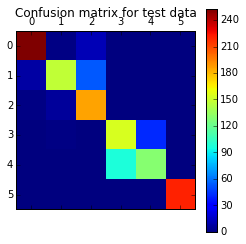

In [2]:
############# ORIGINAL RANDOM FOREST ####################
%matplotlib inline

print('Building original random forest model (no PCA analysis)...')

data = pd.merge(y_var, x_vars, left_index=True, right_index=True)
data = pd.merge(data, subjects, left_index=True, right_index=True)
data['Activity'] = pd.Categorical(data['Activity']).labels

fortrain = data.query('Subject >= 27')
fortest = data.query('Subject <= 6')
forval = data.query("(Subject >= 21) & (Subject < 27)")

train_target = fortrain['Activity']
train_data = fortrain.ix[:,1:-2]
rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
rfc.fit(train_data, train_target)

test_target = fortest['Activity']
test_data = fortest.ix[:,1:-2]
test_pred = rfc.predict(test_data)

print('Model oob: ' + str(rfc.oob_score_))
print("mean accuracy score for test set = %f" %(rfc.score(test_data, test_target)))

test_cm = skm.confusion_matrix(test_target, test_pred)
pl.matshow(test_cm)
pl.title('Confusion matrix for test data')
pl.colorbar()
pl.show()

In [5]:
############# PCA ####################
from sklearn.decomposition import PCA

print('Conducting PCA on x variables...')

pca = PCA(n_components=2)
X_r = pca.fit(x_vars).transform(x_vars)

Conducting PCA on x variables...


In [7]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))


explained variance ratio (first two components): [ 0.6255444   0.04913023]


In [11]:
############# NEW RANDOM FOREST AFTER PCA ####################

print('Building new random forest model with reduced dataset...')

data = pd.merge(y_var, X_r, left_index=True, right_index=True)
data = pd.merge(data, subjects, left_index=True, right_index=True)
data['Activity'] = pd.Categorical(data['Activity']).codes

fortrain = df.query('Subject >= 27')
fortest = df.query('Subject <= 6')
forval = df.query("(Subject >= 21) & (Subject < 27)")

train_target = fortrain['Activity']
train_data = fortrain.ix[:,1:-2]
rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
rfc.fit(train_data, train_target)

test_target = fortest['Activity']
test_data = fortest.ix[:,1:-2]
test_pred = rfc.predict(test_data)

print('Model oob: ' + str(rfc.oob_score_))
print("mean accuracy score for test set = %f" %(rfc.score(test_data, test_target)))

# visualize confusion matrix
test_cm = skm.confusion_matrix(test_target, test_pred)
pl.matshow(test_cm)
pl.title('Confusion matrix for test data')
pl.colorbar()
pl.show()

Building new random forest model with reduced dataset...


AttributeError: 'numpy.ndarray' object has no attribute '_data'